In [346]:
import numpy as np
import pandas as pd

mac_fpath = '/Users/richardmiller/Downloads/'
df = pd.read_csv(mac_fpath+'thyroid_cancer_risk_data.csv')
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


# Data Cleaning

## Check for duplicate entries

In [8]:
df_duplicates = df[df.duplicated()].shape
print(f"There are {df_duplicates[0]} duplicate entries and {df_duplicates[1]} features in the data set.")

There are 0 duplicate entries and 17 features in the data set


## Check for correct data types

### Define a parameter file for the data set

In [308]:
#Note to self: Remove the feature_types entry unless its useful. It seems to be redundant with the feat_categories
params = {
    'feat_categories':{
        'numerical_continuous':['TSH_Level','T3_Level','T4_Level','Nodule_Size'],
        'ordinal':['Age'],
        'binary':['Gender','Family_History','Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes'],
        'categorical_nominal':['Country','Ethnicity','Gender'],
        'categorical_ordinal':['Thyroid_Cancer_Risk']
        },
    'data_types':{
        'TSH_Level':float,
        'T3_Level':float,
        'T4_Level':float,
        'Nodule_Size':float,
        'Age':int,
        'Gender':str,
        'Family_History':str,
        'Radiation_Exposure':str,
        'Iodine_Deficiency':str,
        'Smoking':str,
        'Obesity':str,
        'Diabetes':str,
        'Country':str,
        'Ethnicity':str,
        'Thyroid_Cancer_Risk':str,
    },
    'allowables':{
        'TSH_Level':None,
        'T3_Level':None,
        'T4_Level':None,
        'Nodule_size':None,
        'Age':None,
        'Gender':['Male','Female'],
        'Family_History':['Yes','No'],
        'Radiation_Exposure':['Yes','No'],
        'Iodine_Deficiency':['Yes','No'],
        'Smoking':['Yes','No'],
        'Obesity':['Yes','No'],
        'Diabetes':['Yes','No'],
        'Country':[
            'Russia',
            'Germany',
            'Nigeria',
            'India',
            'UK',
            'South Korea',
            'Brazil',
            'China',
            'Japan',
            'USA',
        ],
        'Ethnicity':[
            'Caucasian',
            'Hispanic',
            'Asian',
            'African','Middle Eastern',
        ],
        'Thyroid_Cancer_Risk':['Low','Medium','High',],
    },
    'feature_types':{
        'TSH_Level':['Numerical','Continuous'],
        'T3_Level':['Numerical','Continuous'],
        'T4_Level':['Numerical','Continuous'],
        'Age':'Ordinal',
        'Gender':'Binary',
        'Family_History':'Binary',
        'Radiation_Exposure':'Binary',
        'Iodine_Deficiency':'Binary',
        'Smoking':'Binary',
        'Obesity':'Binary',
        'Diabetes':'Binary',
        'Country':['Categorical','Nominal'],
        'Ethnicity':['Categorical','Nominal'],
    }
}

### Define data type checking function

In [28]:
def data_type_check(df, feats_dict):
    '''
    Iterates through features list. Checks for nans, entry data types, and 
    allowed values in each feature column.
    
    Prints results.
    Returns nothing.
    '''
    for key,value in feats_dict['feats'].items():
        for item in value:
            data_type = feats_dict['data_types'][item]
            allowables = feats_dict['allowables'][item]

            print(f'{item} has nan values? {df[item].isna().any()}')
            print(f"{item} has invalid data types? {(~df[item].map(lambda x: isinstance(x, data_type))).any()}")
            if allowables is not None:
                print(f"{item} has invalid values? {(~df[item].map(lambda x: x in allowables)).any()}")
                print(' ')
            else:
                print(' ')

### Check the data types

In [29]:
data_type_check(df, params)

TSH_Level has nan values? False
TSH_Level has invalid data types? False
 
T3_Level has nan values? False
T3_Level has invalid data types? False
 
T4_Level has nan values? False
T4_Level has invalid data types? False
 
Age has nan values? False
Age has invalid data types? False
 
Gender has nan values? False
Gender has invalid data types? False
Gender has invalid values? False
 
Family_History has nan values? False
Family_History has invalid data types? False
Family_History has invalid values? False
 
Radiation_Exposure has nan values? False
Radiation_Exposure has invalid data types? False
Radiation_Exposure has invalid values? False
 
Iodine_Deficiency has nan values? False
Iodine_Deficiency has invalid data types? False
Iodine_Deficiency has invalid values? False
 
Smoking has nan values? False
Smoking has invalid data types? False
Smoking has invalid values? False
 
Obesity has nan values? False
Obesity has invalid data types? False
Obesity has invalid values? False
 
Diabetes has na

## Drop unusable columns

In [15]:
df.drop(labels='Patient_ID',axis=1,inplace=True)

## Check for NaNs and Nones

In [17]:
print(df.isna().any())

Age                    False
Gender                 False
Country                False
Ethnicity              False
Family_History         False
Radiation_Exposure     False
Iodine_Deficiency      False
Smoking                False
Obesity                False
Diabetes               False
TSH_Level              False
T3_Level               False
T4_Level               False
Nodule_Size            False
Thyroid_Cancer_Risk    False
Diagnosis              False
dtype: bool


## Standardize data by column

In [35]:
for key,val in params['data_types'].items():
    if val == str:
        df[key].str.lower().str.strip()
    else:
        pass
    
    if val != int and val != float:
        print(df[key].unique())

['Male' 'Female']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Russia' 'Germany' 'Nigeria' 'India' 'UK' 'South Korea' 'Brazil' 'China'
 'Japan' 'USA']
['Caucasian' 'Hispanic' 'Asian' 'African' 'Middle Eastern']
['Low' 'Medium' 'High']


It looks like the data is well curated. There aren't multiple entries in the country such as: 'United States', 'US', and 'USA'.

## Check for duplicated rows

In [27]:
print(f"There are {df.duplicated().sum()} duplicate rows.")

There are 0 duplicate rows.


## Describe the data

In [30]:
df.describe()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,51.918497,5.045102,2.001727,8.246204,2.503403
std,21.632815,2.860264,0.866248,2.164188,1.444631
min,15.000000,0.100000,0.500000,4.500000,0.000000
25%,33.000000,2.570000,1.250000,6.370000,1.250000
50%,52.000000,5.040000,2.000000,8.240000,2.510000
75%,71.000000,7.520000,2.750000,10.120000,3.760000
max,89.000000,10.000000,3.500000,12.000000,5.000000


# Exploratory Data Analysis

## Load EDA packages

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import ttest_ind

## Numerical - Continuous Values

### Check cardinalty of counts

In [141]:
print(df['TSH_Level'].value_counts())

TSH_Level
6.5     2481
1.4     2431
1.9     2429
5.8     2409
7.2     2408
        ... 
6.4     1842
4.1     1840
6.6     1826
0.1     1206
10.0     958
Name: count, Length: 100, dtype: int64


I plotted the histograms and box and whisker plots, the distributions look flat and highly symmetrical. But after checking the counts reveals that there are 991 unique values I will bin this data to reduce the cardinalty of the counts set. This will hopefully fix the issue.

### Bin the numerical continuous data

In [263]:
def rounder(x):
    return round(x)

rounded_feats = {feat:df[feat].apply(rounder) for feat in params['feat_categories']['numerical_continuous']}

for feat in rounded_feats:
    df[feat] = df[feat].apply(rounder)


### Histplots

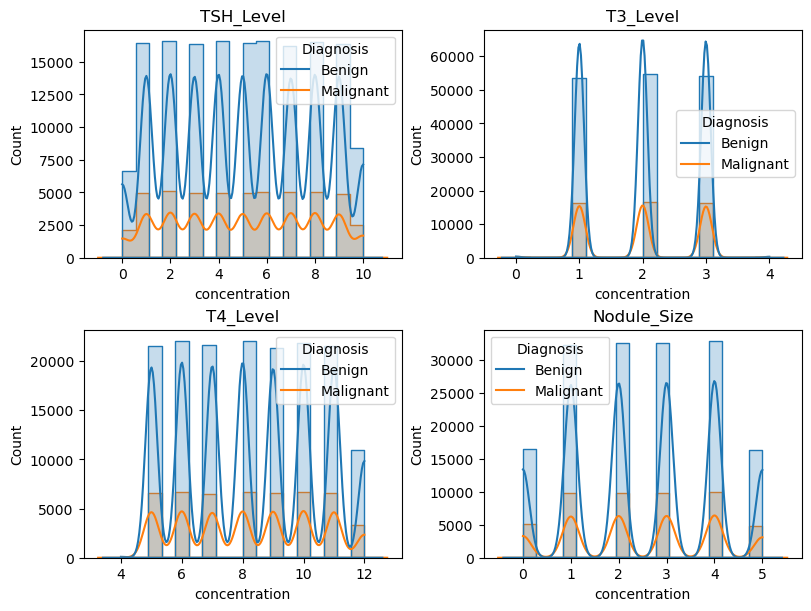

<Figure size 640x480 with 0 Axes>

In [169]:
#Define plot size variables
y = df['Diagnosis']
num_feats = len(params['feat_categories']['numerical_continuous'])
num_rows = math.ceil(math.sqrt(num_feats))
num_cols = math.ceil(num_feats/num_rows)
n=3

#Initialize plot
fig,axs = plt.subplots(nrows=num_rows,ncols=num_cols,sharey=False,constrained_layout=True,figsize=((n+1)*num_rows,n*num_cols))

#Plot histogram
for i,ax in enumerate(axs.flat):
    feat_name = params['feat_categories']['numerical_continuous'][i]
    sns.histplot(
        x=feat_name,
        hue='Diagnosis',
        data=df,
        ax=ax,
        color='orchid',
        kde=True,
        bins=int(np.log2(len(x))+1),
        element='step',
    )
    sns.kdeplot(
        data=df,
        x=feat_name,
        hue='Diagnosis',
        ax=ax,
        common_norm=False
    )
    
    ax.set_title(feat_name)
    ax.set_xlabel('concentration')
    

plt.show()
plt.tight_layout()

## Box and Whisker Plot

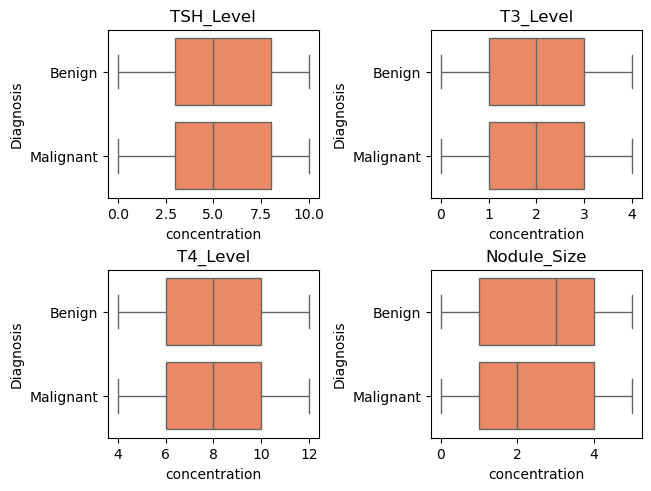

In [152]:
#Define plot size variables
y = df['Diagnosis']
num_feats = len(params['feat_categories']['numerical_continuous'])
num_rows = math.ceil(math.sqrt(num_feats))
num_cols = math.ceil(num_feats/num_rows)
#Initialize subplots
fig,axs = plt.subplots(nrows=num_rows,ncols=num_cols,constrained_layout=True,)

for i,ax in enumerate(axs.flat):
    feat_name = params['feat_categories']['numerical_continuous'][i]
    x = df[feat_name].to_numpy()
    sns.boxplot(x=x,y=y,ax=ax,color='coral')
    ax.set_title(feat_name)
    ax.set_xlabel('concentration')

Vertical seperation of the kde in the TSH histplot shows it may be a good feature for a linear model. I will have to use a t-test to see if this data shows a true relationship. I will need to check if there is a relationship or threshold where malignancy is more likely after a certain size. The kde overlaps in T3 and T4 serum levels looks very similar. These might be related, so I will try to divide T3/T4 for each patient and look for any usefulness. If a relationship is readily apparent in the T3/T4 ratio I will perform a correlation analysis. If there is no apparent relationship, I will try dimensionality reduction (possibly PCA).

**Actions**

* t-test on TSH_Levels
* Look for Nodule_Size threshold
* Ratio of T3/T4
* Correlation Analysis of ratio T3/T4
* Feature Reduction (possibly)

## T-Test on Numerical Continuous Features

In [172]:
benign = df[df['Diagnosis'] == 'Benign']
malignant = df[df['Diagnosis'] == 'Malignant']

for feat in params['feat_categories']['numerical_continuous']:
    stat,p = ttest_ind(benign[feat],malignant[feat],equal_var=False)
    
    print(f"{feat}: t-test score = {stat:.4f}, p-value is {p:.4f} ")

TSH_Level: t-test score = 1.3330, p-value is 0.1825 
T3_Level: t-test score = 1.3319, p-value is 0.1829 
T4_Level: t-test score = -0.6267, p-value is 0.5309 
Nodule_Size: t-test score = 1.6316, p-value is 0.1028 


The t-test shows that the numerical continuous features do not have a linear relationship with malignancy on their own. But there may be some good information hiding in there. I'll dig deaper by checking to see if there is a size threshold. That is, above or below some threshold of Nodule_Size there might be a disproportionate amount of malignant cases.

## Check for Nodule_Size Threshold

### Bin the Nodule_Size data and plot a frequency bar plot

/var/folders/7x/25rxfs7136g01lzlr7gbdzy00000gn/T/ipykernel_1132/1936206317.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_df = df.groupby(['Nodule_Size_Binned', 'Diagnosis']).size().unstack(fill_value=0)


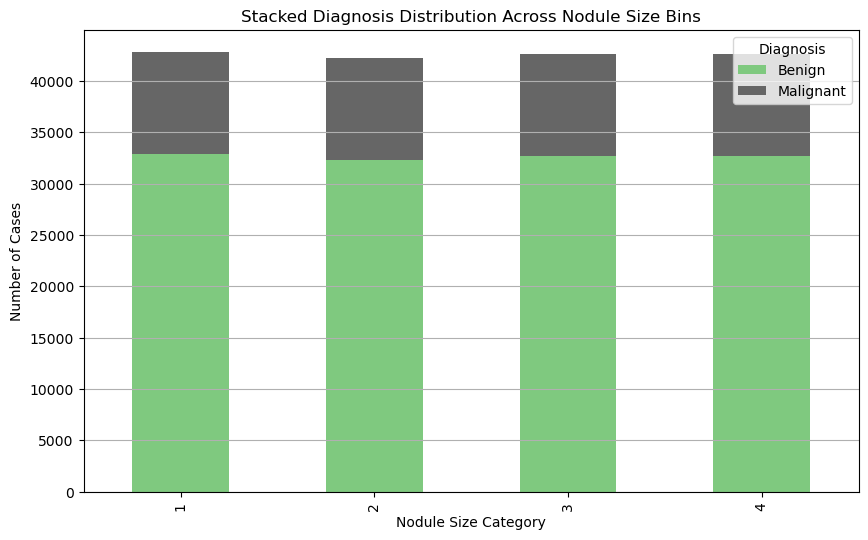

In [275]:
#Bin Nodule_Size feat
bins = [i for i in range(math.ceil(df['Nodule_Size'].max()))]
labels = [i+1 for i in bins][:-1]
df['Nodule_Size_Binned'] = pd.cut(
    df['Nodule_Size'],
    bins=bins,
    labels=labels,
    include_lowest=True,
)
#Prepare data for stacked bar plot
stacked_df = df.groupby(['Nodule_Size_Binned', 'Diagnosis']).size().unstack(fill_value=0)

# Plot
stacked_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
plt.title('Stacked Diagnosis Distribution Across Nodule Size Bins')
plt.xlabel('Nodule Size Category')
plt.ylabel('Number of Cases')
plt.legend(title='Diagnosis')
plt.grid(axis='y')
plt.show()

### Calculate malignancy proportion for each bin and plot a frequency plot

/var/folders/7x/25rxfs7136g01lzlr7gbdzy00000gn/T/ipykernel_1132/95949003.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['Diagnosis'] == 'Malignant'].groupby('Nodule_Size_Binned').size()
/var/folders/7x/25rxfs7136g01lzlr7gbdzy00000gn/T/ipykernel_1132/95949003.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  / df.groupby('Nodule_Size_Binned').size()


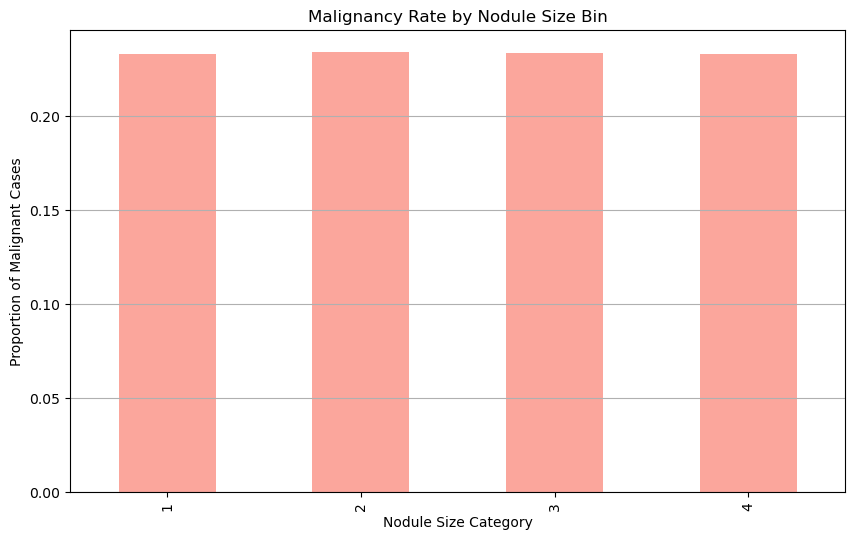

In [276]:
# Calculate malignancy proportion per bin
malignancy_rate = (
    df[df['Diagnosis'] == 'Malignant'].groupby('Nodule_Size_Binned').size()
    / df.groupby('Nodule_Size_Binned').size()
)

# Visualize malignancy rate
malignancy_rate.plot(kind='bar', figsize=(10, 6), color='salmon', alpha=0.7)
plt.title('Malignancy Rate by Nodule Size Bin')
plt.xlabel('Nodule Size Category')
plt.ylabel('Proportion of Malignant Cases')
plt.grid(axis='y')
plt.show()


After binning the raw Nodule_Size data (reloaded the dataframe), I found that the Nodule_Size feat itself is not a good indicator of malignancy because no bin has a significantly larger malignancy count. I confirmed this by plotting the percentage of malignancy cases per bin (salmon) but i see the same flatness. Because of this Nodule_Size might not be a good indicate of malgnancy itself, but it still may be a good feature in conjunction with another feature. 

**Next, plot a scatter plot numerical features to see if there is a relationship between them.**

## Check for Dependencies Among Numeric-Continuous Features

### Generate Pairplots for continuous feats

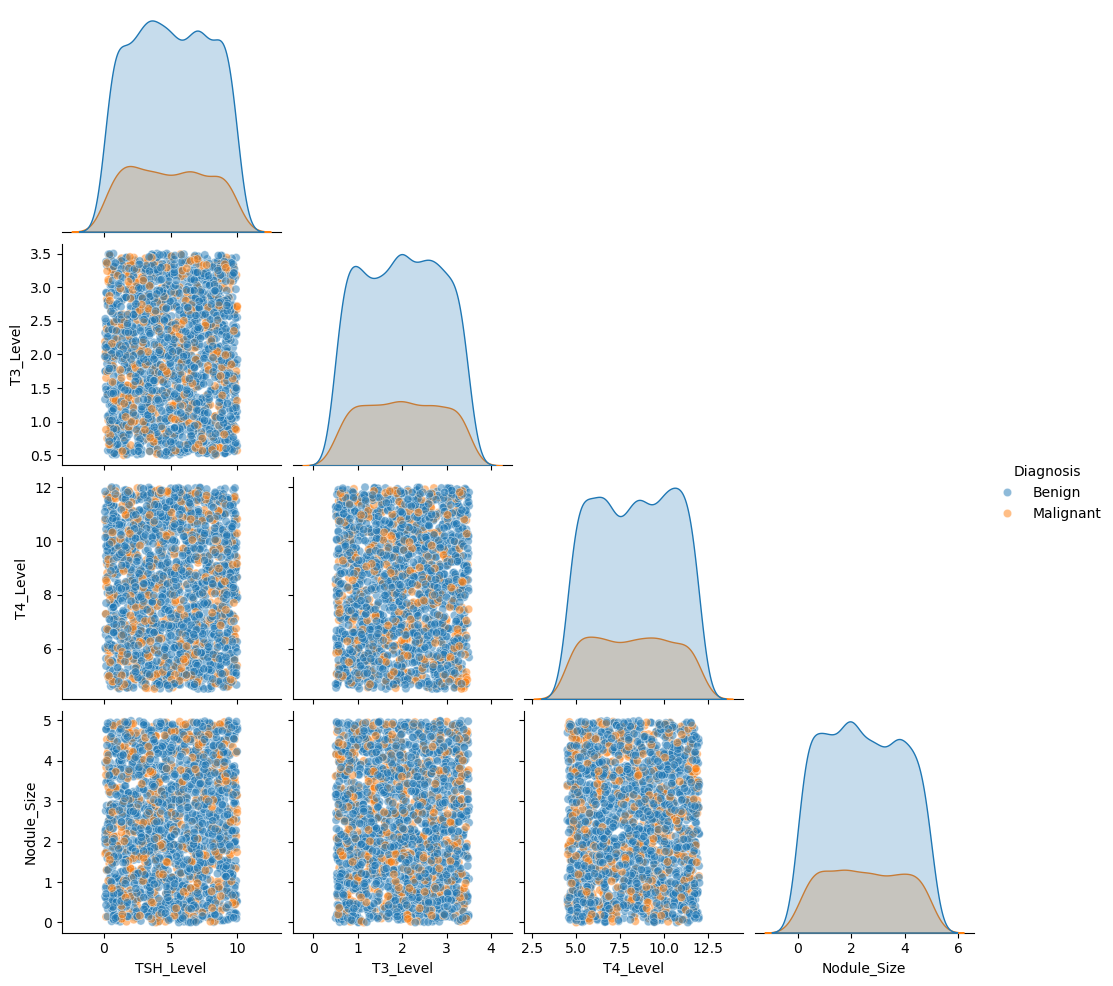

In [286]:
sns.pairplot(df.sample(frac=0.01),corner=True,hue='Diagnosis',vars=params['feat_categories']['numerical_continuous'],plot_kws={'alpha':0.5})
plt.show()

I can't see any useful patterns here, it looks like a colorblindness test. ***I will try to transform the data with a log and possibly square root to see if any patterns emerge in the pairplot and I will also perform another t-test to see if there is an improvement.**

### Transform numerical continuous features with a ratio

In [290]:
feat_names_log_transform = [i+'_log_transformed' for i in params['feat_categories']['numerical_continuous']]
feat_names_sqrt_transform = [i+'_sqrt_transformed' for i in params['feat_categories']['numerical_continuous']]

df[feat_names_log_transform] = df[params['feat_categories']['numerical_continuous']].apply(lambda x: np.log2(x))
df[feat_names_sqrt_transform] = df[params['feat_categories']['numerical_continuous']].apply(lambda x: np.sqrt(x))

/Users/richardmiller/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Pairplot log2 transform

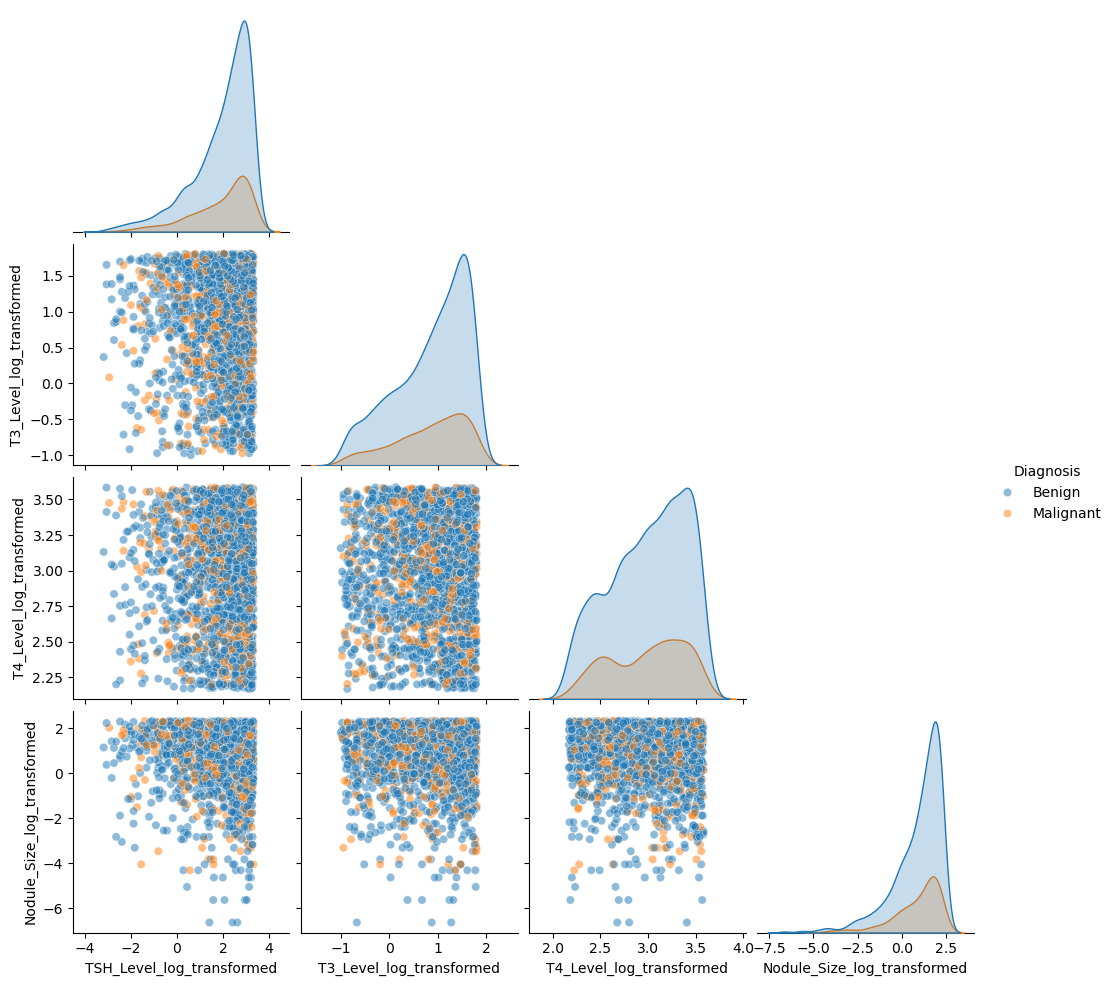

In [291]:
sns.pairplot(df.sample(frac=0.01),corner=True,hue='Diagnosis',vars=feat_names_log_transform,plot_kws={'alpha':0.5})
plt.show()

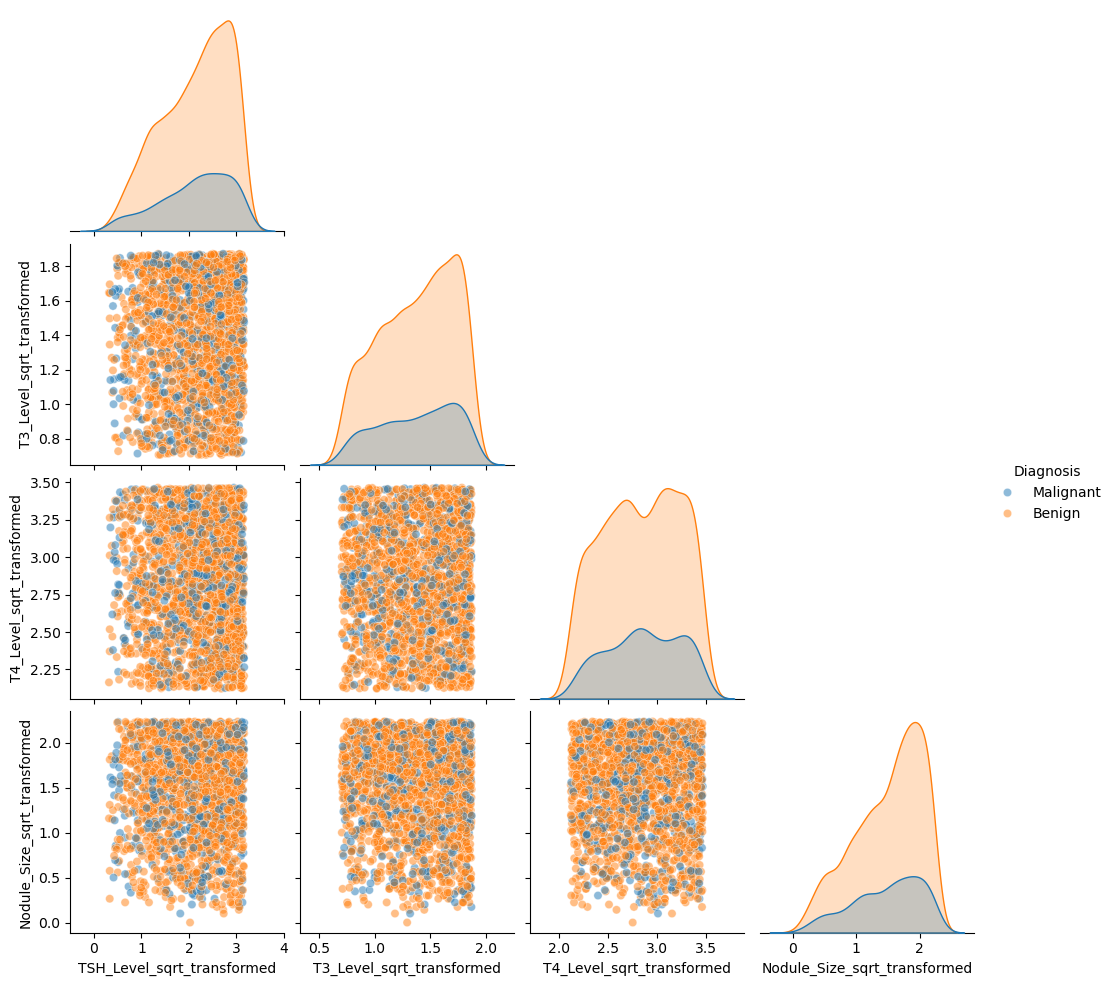

In [292]:
sns.pairplot(df.sample(frac=0.01),corner=True,hue='Diagnosis',vars=feat_names_sqrt_transform,plot_kws={'alpha':0.5})
plt.show()

Both the log and sqrt transform just compress the results into one side of the plot. This indicates that there aren't any clear linear interactions in the data. **I will try (1) Ratios of features, (2) Polynomial Feature Expansion, (3) Dimensionality Reduction, and if all of that fails (4) Using a regressor to find patterns.**

### Create columns in the dataframe with ratios of numeric continuous features

In [299]:
#Define ratio names and make list of original feature names for iterating
ratio_feat_names = ['T3:T4','T3:TSH','T3:NS','T4:TSH','T4:NS','TSH:NS']
ratio_feat_pairs = [
    ('T3_Level','T4_Level'),
    ('T3_Level','TSH_Level'),
    ('T3_Level','Nodule_Size'),
    ('T4_Level','TSH_Level'),
    ('T4_Level','Nodule_Size'),
    ('TSH_Level','Nodule_Size')
]

#Calculate ratios and append to dataframe
for i,pair in enumerate(ratio_feat_pairs):
    df[ratio_feat_names[i]] = df[pair[1]]/df[pair[0]]
    
    
    
    

### t-test to determine if any ratios have a linear relationship with 

In [300]:
ratio_benign = df[df['Diagnosis']=='Benign']
ratio_malignant = df[df['Diagnosis']=='Malignant']

for feat in ratio_feat_names:
    t,p = ttest_ind(ratio_benign[feat],ratio_malignant[feat],equal_var=False)
    print(f"For feature ratio {feat}, the t-statistic is {t:.4f} and the p-value is {p:.4f}")

For feature ratio T3:T4, the t-statistic is 1.1052 and the p-value is 0.2691
For feature ratio T3:TSH, the t-statistic is -0.4110 and the p-value is 0.6811
For feature ratio T3:NS, the t-statistic is nan and the p-value is nan
For feature ratio T4:TSH, the t-statistic is -0.7670 and the p-value is 0.4431
For feature ratio T4:NS, the t-statistic is nan and the p-value is nan
For feature ratio TSH:NS, the t-statistic is nan and the p-value is nan


/Users/richardmiller/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/Users/richardmiller/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6337: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2


The results of the t-test show several NaN's. This is probably due to NaNs when taking the ratio. They all occur in nodule size and they all have nodule size in the denominator so I probably have some zero nodule size. This happened with binned data and when I reloaded the dataframe with raw data. I don't think there is a simple solution to the continuous feature problem. **So, I will no longer look for relationships visually or mathematically. Instead I will impliment a tree based algorithm to find the relationships for me.**

In [305]:
#Import Packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Define ratio names and make list of original feature names for iterating
ratio_feat_names = ['T4:T3','TSH:T3','NS:T3','TSH:T3','NS:T4','NS:TSH']
ratio_feat_pairs = [
    ('T3_Level','T4_Level'),
    ('T3_Level','TSH_Level'),
    ('T3_Level','Nodule_Size'),
    ('T4_Level','TSH_Level'),
    ('T4_Level','Nodule_Size'),
    ('TSH_Level','Nodule_Size')
]

#Calculate ratios and append to dataframe
for i,pair in enumerate(ratio_feat_pairs):
    df[ratio_feat_names[i]] = df[pair[1]]/df[pair[0]]

#Make list of feat names
rfc_feat_list = ratio_feat_names + params['feat_categories']['numerical_continuous']

#Split data into train/test sets
X = df[rfc_feat_list]
y = df['Diagnosis'].apply(lambda x:1 if x=='Malignant' else 0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,)

#Build model and get predictions
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train, y_train)
preds = rfc_model.predict(X_test)

#Generate ordered feature importance series and plot
plt.plot(figsize=(10,8))
feat_importance = pd.Series(rfc_model.feature_importances_,index=X.columns).sort_values(ascending=True)
feat_importance.plot(kind='barh',title='Feature Importance')
plt.xlable('Score')
plt.grid(axis='x')
preds = rfc_model.predict(X_test)


NameError: name 'continuous_feat_select_model' is not defined

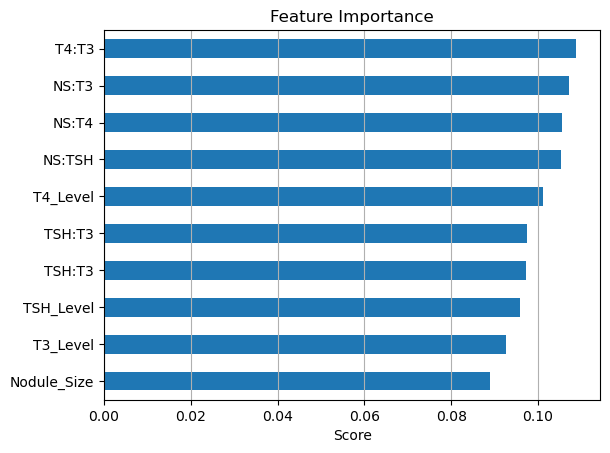

In [307]:
#Generate ordered feature importance series and plot
plt.plot(figsize=(10,8))
feat_importance = pd.Series(rfc_model.feature_importances_,index=X.columns).sort_values(ascending=True)
feat_importance.plot(kind='barh',title='Feature Importance')
plt.xlabel('Score')
plt.grid(axis='x')

**I believe that the ratios of T4/T3, Nodule Size/T3, Nodule Size/T4, Nodule Size/TSH, and T4_Levels are the best features for a classifier model**



## Catagorical Features

### Check cardinality of categorical features

In [ ]:
#Get categorical feat names
nominal_feats = params['feat_categories']['categorical_nominal']
ordinal_feats = params['feat_categories']['categorical_ordinal']

#Encode ordinal feats
ordinal_encoding_dict = {'Low':0,'Medium':1,'High':2}
df[ordinal_feats] = df[ordinal_feats].map(lambda x:ordinal_encoding_dict[x])

In [ ]:
#Encode nominal data
ohe_encoder = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore')
ohe_encoded = ohe_encoder.fit_transform(df[nominal_feats])
encoded_df = pd.DataFrame(ohe_encoded,columns=ohe_encoder.get_feature_names_out(nominal_feats))

#Reset indices for dataframes to ensure alignment
df.reset_index(drop=True,inplace=True)
encoded_df.reset_index(drop=True,inplace=True)

#Concatenate dataframes, check the results
df = pd.concat([df.drop(columns=nominal_feats,inplace=True),encoded_df],axis=1)
df.head()

### Encode binary feature

In [ ]:
#Encode Binary Features
binary_feats = params['feat_categories']['binary']
binary_feat_map = {'Yes':1,'No':0,'Male':1,'Female':0}
df[binary_feats] = df[binary_feats].map(lambda x: binary_feat_map[x])

### Encode the target

In [ ]:
#Encode target
target_feat_map = {'Malignant':0,'Benign':1}
df['Diagnosis'] = df['Diagnosis'].map(lambda x:target_feat_map[x])

Because the notebook is getting extremely long I have taken all the useful transformations and placed them below in the pipeline cell below.

### Check correlation matrix for binary features against diagnosis

Text(0.5, 1.0, 'Correlation Heatmap for Binary Features')

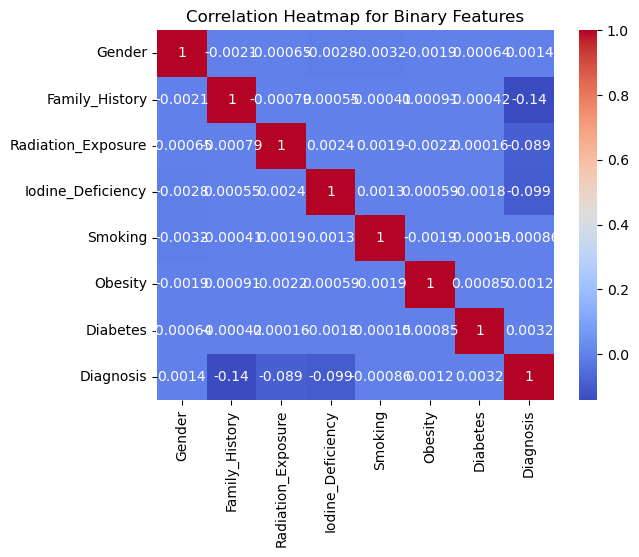

In [357]:
binary_corr = df[binary_feats+['Diagnosis']].corr()
sns.heatmap(binary_corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap for Binary Features')

I don't see a very high correlation in this matrix. This sugguests there isn't a linear dependence with the target from any of the binary features?

## Chi-Squared test to check for significance

In [358]:
from scipy.stats import chi2_contingency
for feat in binary_feats:
    table = pd.crosstab(df[feat],df['Diagnosis'])
    chi,p,dof,exp = chi2_contingency(table)
    print(f"The feature {feat} has chi squared value {chi:.4f} and p-value {p:.4f}")

The feature Gender has chi squared value 0.4337 and p-value 0.5102
The feature Family_History has chi squared value 4223.0592 and p-value 0.0000
The feature Radiation_Exposure has chi squared value 1685.7536 and p-value 0.0000
The feature Iodine_Deficiency has chi squared value 2085.3999 and p-value 0.0000
The feature Smoking has chi squared value 0.1528 and p-value 0.6958
The feature Obesity has chi squared value 0.3172 and p-value 0.5733
The feature Diabetes has chi squared value 2.1839 and p-value 0.1395


In [360]:
#Import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Split data set into train/test sets
X = df.copy()
y = X.pop('Diagnosis')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Train and fit model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)
preds = rf_model.predict(X_test)

print(accuracy_score(preds,y_test))

0.8241613578128306


# Pipeline

In [354]:
#Import necessary packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#Load data file
mac_fpath = '/Users/richardmiller/Downloads/'
df = pd.read_csv(mac_fpath+'thyroid_cancer_risk_data.csv')

#Drop unusable feats
df.drop(labels='Patient_ID',axis=1,inplace=True)

#Define ratio names and make list of original feature names for iterating
ratio_feat_names = ['T3:T4','T3:TSH','T3:NS','T4:TSH','T4:NS','TSH:NS']
ratio_feat_pairs = [
    ('T3_Level','T4_Level'),
    ('T3_Level','TSH_Level'),
    ('T3_Level','Nodule_Size'),
    ('T4_Level','TSH_Level'),
    ('T4_Level','Nodule_Size'),
    ('TSH_Level','Nodule_Size')
]

#Calculate ratios and append to dataframe
for i,pair in enumerate(ratio_feat_pairs):
    df[ratio_feat_names[i]] = df[pair[1]]/df[pair[0]]
    
#Get categorical feat names
nominal_feats = params['feat_categories']['categorical_nominal']
ordinal_feats = params['feat_categories']['categorical_ordinal']

#Encode ordinal feats
ordinal_encoding_dict = {'Low':0,'Medium':1,'High':2}
df[ordinal_feats] = df[ordinal_feats].map(lambda x:ordinal_encoding_dict[x])

#Encode nominal data
ohe_encoder = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore')
ohe_encoded = ohe_encoder.fit_transform(df[nominal_feats])
encoded_df = pd.DataFrame(ohe_encoded,columns=ohe_encoder.get_feature_names_out(nominal_feats))

#Reset indices for dataframes to ensure alignment
df.reset_index(drop=True,inplace=True)
encoded_df.reset_index(drop=True,inplace=True)

#Concatenate dataframes, check the results
df = pd.concat([df,encoded_df],axis=1)
df.drop(columns=nominal_feats,inplace=True)

#Encode Binary Features
binary_feats = params['feat_categories']['binary']
binary_feat_map = {'Yes':1,'No':0,'Male':1,'Female':0}
df[binary_feats] = df[binary_feats].map(lambda x: binary_feat_map[x])

#Encode target
target_feat_map = {'Malignant':0,'Benign':1}
df['Diagnosis'] = df['Diagnosis'].map(lambda x:target_feat_map[x])

/Users/richardmiller/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Modeling

## Model Set Up (Run All)

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

fpath = '/Users/richardmiller/Downloads/thyroid_cancer_risk_data.csv'
scores_dict = {}

In [15]:
def numerical_continuous(df,top,bottom):
    df[top+':'+bottom] = df[top]/df[bottom]
    df = df.drop([top,bottom],axis=1)
    return df

def binary_combiner(df,feats,combined_name):
    df[combined_name] = df[feats].sum(axis=1)
    df = df.drop(feats,axis=1)
    return df

def data_load_parse(fname,params,drop_list,resample=False,combined_feats=False):
    #Load data from csv
    if fname == 'kaggle':
        df = pd.read_csv('/kaggle/input/thyroid-cancer-risk-dataset/thyroid_cancer_risk_data.csv')
    else:
        df = pd.read_csv(fname)
       
    config = params.copy()
    
    
    #Extract feature categories dicts
    all_feats = config['feat_categories']
    #Drop features not included in model
    for cat in all_feats.keys():
        all_feats['binary'] = [i for i in all_feats['binary'] if i not in drop_list]

    #Resample data if requested
    if resample == True:
        #Split dataset into target majority/minoirty
        target_majority = df[df['Diagnosis']=='Benign']
        target_minority = df[df['Diagnosis']=='Malignant']

        #Resample majority
        reduced_majority_df = resample(
            target_majority,
            replace=False,
            n_samples=len(target_minority),
        )

        #Join dataframes to make new dataset
        df = pd.concat([reduced_majority_df,target_minority],axis=0)
  
    #Encode Binary Features
    if all_feats['binary'] != None and len(all_feats['binary']) > 0:
        binary_feat_map = {'Yes':1,'No':0,'Male':1,'Female':0,'Benign':0,'Malignant':1}
        df[all_feats['binary']] = df[all_feats['binary']].map(lambda x: binary_feat_map[x])
    
    if all_feats['categorical_nominal'] != None and len(all_feats['categorical_nominal']) > 0:
        cn_feats = []
        for feat in all_feats['categorical_nominal']:
            if feat not in drop_list:
                cn_feats.append(feat)
                
        all_feats['categorical_nominal'] = cn_feats
        ohe_encoder = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore')
        ohe_encoded = ohe_encoder.fit_transform(df[all_feats['categorical_nominal']])
        encoded_df = pd.DataFrame(ohe_encoded,columns=ohe_encoder.get_feature_names_out(all_feats['categorical_nominal']))

        #Reset indices for dataframes to ensure alignment
        df.reset_index(drop=True,inplace=True)
        encoded_df.reset_index(drop=True,inplace=True)

        #Concatenate dataframes
        df = pd.concat([df,encoded_df],axis=1)
        print(df.columns)
        df = df.drop(columns=all_feats['categorical_nominal'],inplace=True)
        we
    if all_feats['categorical_ordinal'] != None and len(all_feats['categorical_ordinal']) > 0:
        ordinal_encoding_dict = {'Low':0,'Medium':1,'High':2}
        df[all_feats['categorical_ordinal']] = df[all_feats['categorical_ordinal']].map(lambda x:ordinal_encoding_dict[x])
    
    df = df.drop(drop_list,axis=1)
    return df

In [22]:
p = {
        'feat_categories':{
            'numerical_continuous':['TSH_Level','T3_Level','T4_Level','Nodule_Size'],
            'ordinal':['Age'],
            'binary':['Gender','Family_History','Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes','Diagnosis'],
            'categorical_nominal':['Country','Ethnicity']
            'categorical_ordinal':['Thyroid_Cancer_Risk'],
            },
        'data_types':{
            'TSH_Level':float,
            'T3_Level':float,
            'T4_Level':float,
            'Nodule_Size':float,
            'Age':int,
            'Gender':str,
            'Family_History':str,
            'Radiation_Exposure':str,
            'Iodine_Deficiency':str,
            'Smoking':str,
            'Obesity':str,
            'Diabetes':str,
            'Country':str,
            'Ethnicity':str,
            'Thyroid_Cancer_Risk':str,
        },
        'allowables':{
            'Nodule_Size':None,
            'TSH_Level':None,
            'T3_Level':None,
            'T4_Level':None,
            'Nodule_size':None,
            'Age':None,
            'Gender':['Male','Female'],
            'Family_History':['Yes','No'],
            'Radiation_Exposure':['Yes','No'],
            'Iodine_Deficiency':['Yes','No'],
            'Smoking':['Yes','No'],
            'Obesity':['Yes','No'],
            'Diabetes':['Yes','No'],
            'Country':[
                'Russia',
                'Germany',
                'Nigeria',
                'India',
                'UK',
                'South Korea',
                'Brazil',
                'China',
                'Japan',
                'USA',
            ],
            'Ethnicity':[
                'Caucasian',
                'Hispanic',
                'Asian',
                'African',
                'Middle Eastern',
            ],
            'Thyroid_Cancer_Risk':['Low','Medium','High',],
        },
    }

## Model 1 - (NS:T3, TSH:T4) and all Binaries

In [16]:
drop_list_1 = ['Ethnicity','Country','Patient_ID',]
df_1 = data_load_parse(fname=fpath,drop_list=drop_list_1,params=param_loader())

df_1 = numerical_continuous(df_1,'TSH_Level','T3_Level')
df_1 = numerical_continuous(df_1,'Nodule_Size','T4_Level')
X_1 = df_1.copy()
y_1 = X_1.pop('Diagnosis')

X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split(X_1,y_1,test_size=0.2)
X_1_train_, X_1_test, y_1_train_, y_1_test = train_test_split(X_1_train,y_1_train,test_size=0.1)

rf_model_1 = RandomForestClassifier()
rf_model_1.fit(X_1_train_,y_1_train_)

preds_1 = rf_model_1.predict(X_1_test)

accuracy_1 = accuracy_score(y_1_test,preds_1)
precision_1 = precision_score(y_1_test,preds_1)
f1_1 = f1_score(y_1_test,preds_1)
recall_1 = recall_score(y_1_test,preds_1)
auc_1 = roc_auc_score(y_1_test,preds_1)
print(f"Model 1 scores:\\n Accuracy: {accuracy_1}\\n Precision: {precision_1}\\n Recall: {recall_1}\\n F1 Score: {f1_1}\\n AUC Score: {auc_1}")
scores_dict['Model1'] = {
    'accuracy':accuracy_1,
    'precision':precision_1,
    'f1':f1_1,
    'recall':recall_1,
    'auc':auc_1,
}

/Users/richardmiller/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')


TypeError: 'NoneType' object is not subscriptable

In [39]:
p = {
        'feat_categories':{
            'numerical_continuous':['TSH_Level','T3_Level','T4_Level','Nodule_Size'],
            'ordinal':['Age'],
            'binary':['Gender','Family_History','Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes','Diagnosis'],
            'categorical_nominal':['Country'],#,'Ethnicity',], Drop Ethnicity, feature doesn't provide good data
            'categorical_ordinal':['Thyroid_Cancer_Risk'],
            },
        'allowables':{
            'Nodule_Size':None,
            'TSH_Level':None,
            'T3_Level':None,
            'T4_Level':None,
            'Nodule_size':None,
            'Age':None,
            'Gender':['Male','Female'],
            'Family_History':['Yes','No'],
            'Radiation_Exposure':['Yes','No'],
            'Iodine_Deficiency':['Yes','No'],
            'Smoking':['Yes','No'],
            'Obesity':['Yes','No'],
            'Diabetes':['Yes','No'],
            'Country':[
                'Russia',
                'Germany',
                'Nigeria',
                'India',
                'UK',
                'South Korea',
                'Brazil',
                'China',
                'Japan',
                'USA',
            ],
            'Ethnicity':[
                'Caucasian',
                'Hispanic',
                'Asian',
                'African',
                'Middle Eastern',
            ],
            'Thyroid_Cancer_Risk':['Low','Medium','High',],
        },
    }

    